In [252]:
using Distributions
using Plots
using BSON

In [147]:
function transition(system::Array{Int64,1}, parameters::Dict{String,Any})::Array{Float64,2}
    
    # initialize -
    TM = zeros(2,2)
    A = system[1]
    B = system[2]
        
    # get parameters -
    K1 = parameters["K1"]
    n1 = parameters["n1"]
    K2 = parameters["K2"]
    n2 = parameters["n2"]
    Z1 = parameters["Z1"]
    Z2 = parameters["Z2"]
    
    # compute state factors -
    p1 = (A^n1/(K1^n1+A^n1))
    p2 = (B^n2/(K2^n2+B^n2))
    
    # package -
    TM[1,1] = 1 - p1
    TM[1,2] = p1
    TM[2,1] = p2
    TM[2,2] = 1 - p2
    
    @show (A, B, p1,p2)
    
    # return -
    return TM
end

transition (generic function with 2 methods)

In [148]:
function machine(state::Int64, system::Array{Int64,1}, parameters::Dict{String,Any})::Int64
       
    # compute the probabilities -
    T = transition(system, parameters)
    
    # get possible transitions that can occur -
    choices = round.(abs.(T[state,:]),digits=2)
        
    # create a new categorical distribution -
    d = Categorical(choices)
    
    # what is the new state?
    new_state = rand(d)
    
    @show (choices, state, new_state)
    
    # sample -
    return new_state
end

machine (generic function with 2 methods)

In [232]:
function simulation(parameters::Dict{String,Any}, initial::Array{Int64,1}; T::Int64 = 100, 𝒫::Int64 = 100)
    
    # build the Poisson -
    λ = 13.7
    d = Poisson(λ)

    # S -
    S = [-1 0 ; 0 1]

    # set the system dimensions -
    number_of_chemical_species = length(initial)
    number_of_time_steps = T
    number_of_sample_paths = 𝒫
    
    # initialize: machine state -
    machine_state = Array{Int64,2}(undef, number_of_time_steps, number_of_sample_paths)

    # initialize: chemical state -
    chemical_state = Array{Int64,3}(undef, number_of_time_steps, number_of_chemical_species, number_of_sample_paths)

    # main simulation loop -
    for s ∈ 1:number_of_sample_paths
        
        # setup the chemical state -
        chemical_state[1,1,s] = initial[1]
        chemical_state[1,2,s] = initial[2]
        
        # setup the machine state -
        machine_state[1,s] = rand(1:2)
        
        for t ∈ 2:number_of_time_steps
        
            # run the machine -
            machine_state[t,s] = machine(machine_state[t-1,s], chemical_state[t-1,:,s], parameters)
            
            # the enzyme has activity if machine in state 2 -
            Δ = ones(2)*rand(d)
            rV = S*Δ
            
            # if machine state == 2, then the enzyme has activity
            if (machine_state[t,s] == 2 && (chemical_state[t-1,1,s] + rV[1]) >= 0)

                # update the chemical state -
                chemical_state[t,1,s] = chemical_state[t-1,1,s] + rV[1]
                chemical_state[t,2,s] = chemical_state[t-1,2,s] + rV[2]
            else

                # no reaction, the chemical state stays the same -
                chemical_state[t,1,s] = chemical_state[t-1,1,s]
                chemical_state[t,2,s] = chemical_state[t-1,2,s]
            end
        end 
    end

    # return the chemical state -
    return (chemical_state, machine_state)
end

simulation (generic function with 2 methods)

In [255]:
# Setup parameters -
K1 = 500
n1 = 6
K2 = 500
n2 = 1
T = 137

# compute normalizing constant -
MA = range(0,stop=1000,step=1) |> collect;
Z1 = sum((MA.^n1)./(K1^n1 .+ MA.^n1));
Z2 = sum((MA.^n2)./(K2^n2 .+ MA.^n2));

parameters = Dict{String,Any}()
parameters["K1"] = K1
parameters["n1"] = n1
parameters["K2"] = K2
parameters["n2"] = n2
parameters["Z1"] = Z1
parameters["Z2"] = Z2

# how many sample paths?
N = 1000
initial = [1000,0]

(chemical_state, machine_state) = simulation(parameters,initial; T = T, 𝒫 = N);

(A, B, p1, p2) = (1000, 0, 0.9846153846153847, 0.0)
(choices, state, new_state) = ([0.02, 0.98], 1, 2)
(A, B, p1, p2) = (988, 12, 0.9834787336859795, 0.0234375)
(choices, state, new_state) = ([0.02, 0.98], 2, 2)
(A, B, p1, p2) = (976, 24, 0.9822441860030062, 0.04580152671755725)
(choices, state, new_state) = ([0.05, 0.95], 2, 2)
(A, B, p1, p2) = (964, 36, 0.9809021917929743, 0.06716417910447761)
(choices, state, new_state) = ([0.07, 0.93], 2, 2)
(A, B, p1, p2) = (952, 48, 0.979442176305736, 0.08759124087591241)
(choices, state, new_state) = ([0.09, 0.91], 2, 2)
(A, B, p1, p2) = (942, 58, 0.9781269259310688, 0.1039426523297491)
(choices, state, new_state) = ([0.1, 0.9], 2, 2)
(A, B, p1, p2) = (931, 69, 0.9765672059100319, 0.12126537785588752)
(choices, state, new_state) = ([0.12, 0.88], 2, 2)
(A, B, p1, p2) = (917, 83, 0.9743941797098569, 0.1423670668953688)
(choices, state, new_state) = ([0.14, 0.86], 2, 2)
(A, B, p1, p2) = (896, 104, 0.9706875953238118, 0.17218543046357615)
(choices, 

(A, B, p1, p2) = (359, 641, 0.12049889269017304, 0.5617879053461875)
(choices, state, new_state) = ([0.88, 0.12], 1, 1)
(A, B, p1, p2) = (359, 641, 0.12049889269017304, 0.5617879053461875)
(choices, state, new_state) = ([0.88, 0.12], 1, 2)
(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.57, 0.43], 2, 2)
(A, B, p1, p2) = (328, 672, 0.07381124646745475, 0.5733788395904437)
(choices, state, new_state) = ([0.57, 0.43], 2, 2)
(A, B, p1, p2) = (311, 689, 0.054738665076525105, 0.5794785534062237)
(choices, state, new_state) = ([0.58, 0.42], 2, 1)
(A, B, p1, p2) = (311, 689, 0.054738665076525105, 0.5794785534062237)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (311, 689, 0.054738665076525105, 0.5794785534062237)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (311, 689, 0.054738665076525105, 0.5794785534062237)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (311, 689, 0.054738

(A, B, p1, p2) = (627, 373, 0.7954394408409082, 0.427262313860252)
(choices, state, new_state) = ([0.43, 0.57], 2, 2)
(A, B, p1, p2) = (615, 385, 0.775926733002301, 0.4350282485875706)
(choices, state, new_state) = ([0.44, 0.56], 2, 1)
(A, B, p1, p2) = (615, 385, 0.775926733002301, 0.4350282485875706)
(choices, state, new_state) = ([0.22, 0.78], 1, 2)
(A, B, p1, p2) = (596, 404, 0.7415030561422576, 0.4469026548672566)
(choices, state, new_state) = ([0.45, 0.55], 2, 1)
(A, B, p1, p2) = (596, 404, 0.7415030561422576, 0.4469026548672566)
(choices, state, new_state) = ([0.26, 0.74], 1, 2)
(A, B, p1, p2) = (580, 420, 0.7089974769905071, 0.45652173913043476)
(choices, state, new_state) = ([0.46, 0.54], 2, 2)
(A, B, p1, p2) = (557, 443, 0.6565016387517042, 0.46977730646871685)
(choices, state, new_state) = ([0.47, 0.53], 2, 1)
(A, B, p1, p2) = (557, 443, 0.6565016387517042, 0.46977730646871685)
(choices, state, new_state) = ([0.34, 0.66], 1, 1)
(A, B, p1, p2) = (557, 443, 0.6565016387517042, 

(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (305, 695, 0.04899607807628882, 0.5815899581589958)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (305, 695, 0.04899607807628882, 0.5815899581589958)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (305, 695, 0.04899607807628882, 0.5815899581589958)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (305, 695, 0.04899607807628882, 0.5815899581589958)
(choices, state, new_state) = ([0.95, 0.05], 1, 2)
(A, B, p1, p2) = (289, 711, 0.03594742206487557, 0.5871180842279108)
(choices, state, new_state) = ([0.59, 0.41], 2, 1)
(A, B, p1, p2) = (289, 711, 0.03594742206487557, 0.5871180842279108)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (289, 711, 0.03594742206487557, 0.5871180842279108)
(choices, state, new_state) = ([0.96, 0.04], 1, 2)
(A, B, p1, p2) = (278, 722, 0.028694880937948267, 0.5908346972176759)
(choices, state, new_state) = ([0.59, 0

(A, B, p1, p2) = (367, 633, 0.13523105727564314, 0.558693733451015)
(choices, state, new_state) = ([0.56, 0.44], 2, 2)
(A, B, p1, p2) = (359, 641, 0.12049889269017304, 0.5617879053461875)
(choices, state, new_state) = ([0.56, 0.44], 2, 2)
(A, B, p1, p2) = (346, 654, 0.09894377133145094, 0.5667244367417678)
(choices, state, new_state) = ([0.57, 0.43], 2, 1)
(A, B, p1, p2) = (346, 654, 0.09894377133145094, 0.5667244367417678)
(choices, state, new_state) = ([0.9, 0.1], 1, 1)
(A, B, p1, p2) = (346, 654, 0.09894377133145094, 0.5667244367417678)
(choices, state, new_state) = ([0.9, 0.1], 1, 1)
(A, B, p1, p2) = (346, 654, 0.09894377133145094, 0.5667244367417678)
(choices, state, new_state) = ([0.9, 0.1], 1, 2)
(A, B, p1, p2) = (330, 670, 0.0763438308378947, 0.5726495726495726)
(choices, state, new_state) = ([0.57, 0.43], 2, 2)
(A, B, p1, p2) = (317, 683, 0.0609830285938711, 0.577345731191885)
(choices, state, new_state) = ([0.58, 0.42], 2, 2)
(A, B, p1, p2) = (303, 697, 0.047189179437005756, 

(A, B, p1, p2) = (732, 268, 0.9077975336720749, 0.3489583333333333)
(choices, state, new_state) = ([0.35, 0.65], 2, 2)
(A, B, p1, p2) = (716, 284, 0.8960822431512584, 0.3622448979591837)
(choices, state, new_state) = ([0.36, 0.64], 2, 2)
(A, B, p1, p2) = (698, 302, 0.8809718890815929, 0.3765586034912718)
(choices, state, new_state) = ([0.38, 0.62], 2, 2)
(A, B, p1, p2) = (686, 314, 0.8696215991969833, 0.3857493857493858)
(choices, state, new_state) = ([0.39, 0.61], 2, 2)
(A, B, p1, p2) = (674, 326, 0.8571395027075044, 0.3946731234866828)
(choices, state, new_state) = ([0.39, 0.61], 2, 2)
(A, B, p1, p2) = (657, 343, 0.8373246702464386, 0.4068801897983393)
(choices, state, new_state) = ([0.41, 0.59], 2, 2)
(A, B, p1, p2) = (640, 360, 0.8147477984965562, 0.4186046511627907)
(choices, state, new_state) = ([0.42, 0.58], 2, 2)
(A, B, p1, p2) = (629, 371, 0.7985311099404486, 0.425947187141217)
(choices, state, new_state) = ([0.43, 0.57], 2, 2)
(A, B, p1, p2) = (612, 388, 0.7707843032293566, 0

(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.59, 0.41], 2, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.025810666906936418, 0.5925020374898126)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (273, 727, 0.02

(A, B, p1, p2) = (445, 555, 0.33198897939596733, 0.5260663507109005)
(choices, state, new_state) = ([0.67, 0.33], 1, 2)
(A, B, p1, p2) = (431, 569, 0.29090349535835597, 0.5322731524789522)
(choices, state, new_state) = ([0.53, 0.47], 2, 2)
(A, B, p1, p2) = (417, 583, 0.2517819031448662, 0.5383194829178208)
(choices, state, new_state) = ([0.54, 0.46], 2, 2)
(A, B, p1, p2) = (396, 604, 0.19794891301292075, 0.5471014492753623)
(choices, state, new_state) = ([0.55, 0.45], 2, 1)
(A, B, p1, p2) = (396, 604, 0.19794891301292075, 0.5471014492753623)
(choices, state, new_state) = ([0.8, 0.2], 1, 1)
(A, B, p1, p2) = (396, 604, 0.19794891301292075, 0.5471014492753623)
(choices, state, new_state) = ([0.8, 0.2], 1, 2)
(A, B, p1, p2) = (382, 618, 0.16587829849562766, 0.552772808586762)
(choices, state, new_state) = ([0.55, 0.45], 2, 1)
(A, B, p1, p2) = (382, 618, 0.16587829849562766, 0.552772808586762)
(choices, state, new_state) = ([0.83, 0.17], 1, 1)
(A, B, p1, p2) = (382, 618, 0.16587829849562766

(A, B, p1, p2) = (911, 89, 0.9733928763576705, 0.15110356536502548)
(choices, state, new_state) = ([0.03, 0.97], 1, 2)
(A, B, p1, p2) = (902, 98, 0.97180576774044, 0.16387959866220736)
(choices, state, new_state) = ([0.16, 0.84], 2, 2)
(A, B, p1, p2) = (885, 115, 0.9685035491544169, 0.18699186991869918)
(choices, state, new_state) = ([0.19, 0.81], 2, 2)
(A, B, p1, p2) = (867, 133, 0.9645173942849893, 0.21011058451816747)
(choices, state, new_state) = ([0.21, 0.79], 2, 2)
(A, B, p1, p2) = (847, 153, 0.9594006058852715, 0.2343032159264931)
(choices, state, new_state) = ([0.23, 0.77], 2, 1)
(A, B, p1, p2) = (847, 153, 0.9594006058852715, 0.2343032159264931)
(choices, state, new_state) = ([0.04, 0.96], 1, 1)
(A, B, p1, p2) = (847, 153, 0.9594006058852715, 0.2343032159264931)
(choices, state, new_state) = ([0.04, 0.96], 1, 2)
(A, B, p1, p2) = (838, 162, 0.9568291773644251, 0.24471299093655588)
(choices, state, new_state) = ([0.24, 0.76], 2, 2)
(A, B, p1, p2) = (832, 168, 0.9550127706012739,

(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (333, 667, 0.08026191973436685, 0.5715509854327335)
(choices, state, new_state) = ([0.92, 0.08], 1, 2)
(A, B, p1, p2) = (318, 682, 0.06207420604755109, 0.5769881556683587)
(choices, state, new_state) = ([0.58, 0.

(A, B, p1, p2) = (466, 534, 0.395910357547551, 0.5164410058027079)
(choices, state, new_state) = ([0.6, 0.4], 1, 1)
(A, B, p1, p2) = (466, 534, 0.395910357547551, 0.5164410058027079)
(choices, state, new_state) = ([0.6, 0.4], 1, 1)
(A, B, p1, p2) = (466, 534, 0.395910357547551, 0.5164410058027079)
(choices, state, new_state) = ([0.6, 0.4], 1, 1)
(A, B, p1, p2) = (466, 534, 0.395910357547551, 0.5164410058027079)
(choices, state, new_state) = ([0.6, 0.4], 1, 1)
(A, B, p1, p2) = (466, 534, 0.395910357547551, 0.5164410058027079)
(choices, state, new_state) = ([0.6, 0.4], 1, 2)
(A, B, p1, p2) = (455, 545, 0.3621917142017848, 0.5215311004784688)
(choices, state, new_state) = ([0.52, 0.48], 2, 2)
(A, B, p1, p2) = (435, 565, 0.3024681054962651, 0.5305164319248826)
(choices, state, new_state) = ([0.53, 0.47], 2, 1)
(A, B, p1, p2) = (435, 565, 0.3024681054962651, 0.5305164319248826)
(choices, state, new_state) = ([0.7, 0.3], 1, 1)
(A, B, p1, p2) = (435, 565, 0.3024681054962651, 0.530516431924882

(A, B, p1, p2) = (262, 738, 0.02028099484810874, 0.5961227786752827)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (262, 738, 0.02028099484810874, 0.5961227786752827)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (262, 738, 0.02028099484810874, 0.5961227786752827)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (262, 738, 0.02028099484810874, 0.5961227786752827)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (262, 738, 0.02028099484810874, 0.5961227786752827)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (1000, 0, 0.9846153846153847, 0.0)
(choices, state, new_state) = ([0.0, 1.0], 2, 2)
(A, B, p1, p2) = (982, 18, 0.9828742710600781, 0.03474903474903475)
(choices, state, new_state) = ([0.03, 0.97], 2, 2)
(A, B, p1, p2) = (963, 37, 0.9807851853067996, 0.06890130353817504)
(choices, state, new_state) = ([0.07, 0.93], 2, 1)
(A, B, p1, p2) = (963, 37, 0.9807851853067996, 0.068901303538

(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.15314896501858075, 0.5551601423487544)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (376, 624, 0.1531489650

(A, B, p1, p2) = (698, 302, 0.8809718890815929, 0.3765586034912718)
(choices, state, new_state) = ([0.12, 0.88], 1, 2)
(A, B, p1, p2) = (692, 308, 0.87543215440556, 0.3811881188118812)
(choices, state, new_state) = ([0.38, 0.62], 2, 2)
(A, B, p1, p2) = (679, 321, 0.8624842195126751, 0.3909866017052375)
(choices, state, new_state) = ([0.39, 0.61], 2, 2)
(A, B, p1, p2) = (663, 337, 0.8446184590130307, 0.4026284348864994)
(choices, state, new_state) = ([0.4, 0.6], 2, 2)
(A, B, p1, p2) = (648, 352, 0.8257348299037087, 0.4131455399061033)
(choices, state, new_state) = ([0.41, 0.59], 2, 1)
(A, B, p1, p2) = (648, 352, 0.8257348299037087, 0.4131455399061033)
(choices, state, new_state) = ([0.17, 0.83], 1, 2)
(A, B, p1, p2) = (639, 361, 0.8133275034680981, 0.41927990708478513)
(choices, state, new_state) = ([0.42, 0.58], 2, 1)
(A, B, p1, p2) = (639, 361, 0.8133275034680981, 0.41927990708478513)
(choices, state, new_state) = ([0.19, 0.81], 1, 1)
(A, B, p1, p2) = (639, 361, 0.8133275034680981, 0.

(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.0689335600

(choices, state, new_state) = ([0.76, 0.24], 1, 1)
(A, B, p1, p2) = (412, 588, 0.23839329192084838, 0.5404411764705882)
(choices, state, new_state) = ([0.76, 0.24], 1, 1)
(A, B, p1, p2) = (412, 588, 0.23839329192084838, 0.5404411764705882)
(choices, state, new_state) = ([0.76, 0.24], 1, 1)
(A, B, p1, p2) = (412, 588, 0.23839329192084838, 0.5404411764705882)
(choices, state, new_state) = ([0.76, 0.24], 1, 1)
(A, B, p1, p2) = (412, 588, 0.23839329192084838, 0.5404411764705882)
(choices, state, new_state) = ([0.76, 0.24], 1, 2)
(A, B, p1, p2) = (401, 599, 0.21017348245505407, 0.5450409463148317)
(choices, state, new_state) = ([0.55, 0.45], 2, 2)
(A, B, p1, p2) = (380, 620, 0.16156614413993484, 0.5535714285714286)
(choices, state, new_state) = ([0.55, 0.45], 2, 2)
(A, B, p1, p2) = (361, 639, 0.12407645728355762, 0.5610184372256365)
(choices, state, new_state) = ([0.56, 0.44], 2, 2)
(A, B, p1, p2) = (346, 654, 0.09894377133145094, 0.5667244367417678)
(choices, state, new_state) = ([0.57, 0.

(A, B, p1, p2) = (790, 210, 0.9396047632552748, 0.29577464788732394)
(choices, state, new_state) = ([0.3, 0.7], 2, 1)
(A, B, p1, p2) = (790, 210, 0.9396047632552748, 0.29577464788732394)
(choices, state, new_state) = ([0.06, 0.94], 1, 2)
(A, B, p1, p2) = (774, 226, 0.9322503847507629, 0.31129476584022037)
(choices, state, new_state) = ([0.31, 0.69], 2, 1)
(A, B, p1, p2) = (774, 226, 0.9322503847507629, 0.31129476584022037)
(choices, state, new_state) = ([0.07, 0.93], 1, 2)
(A, B, p1, p2) = (763, 237, 0.9266205071802769, 0.32157394843962006)
(choices, state, new_state) = ([0.32, 0.68], 2, 2)
(A, B, p1, p2) = (748, 252, 0.9180971389609747, 0.3351063829787234)
(choices, state, new_state) = ([0.34, 0.66], 2, 2)
(A, B, p1, p2) = (736, 264, 0.910498113327568, 0.34554973821989526)
(choices, state, new_state) = ([0.35, 0.65], 2, 2)
(A, B, p1, p2) = (719, 281, 0.8983952249506149, 0.35979513444302175)
(choices, state, new_state) = ([0.36, 0.64], 2, 1)
(A, B, p1, p2) = (719, 281, 0.89839522495061

(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771, 0.588477366255144)
(choices, state, new_state) = ([0.97, 0.03], 1, 1)
(A, B, p1, p2) = (285, 715, 0.03315920434631771,

(A, B, p1, p2) = (461, 539, 0.38053917532938875, 0.5187680461982676)
(choices, state, new_state) = ([0.62, 0.38], 1, 1)
(A, B, p1, p2) = (461, 539, 0.38053917532938875, 0.5187680461982676)
(choices, state, new_state) = ([0.62, 0.38], 1, 2)
(A, B, p1, p2) = (447, 553, 0.3379826899162804, 0.5251661918328585)
(choices, state, new_state) = ([0.53, 0.47], 2, 1)
(A, B, p1, p2) = (447, 553, 0.3379826899162804, 0.5251661918328585)
(choices, state, new_state) = ([0.66, 0.34], 1, 1)
(A, B, p1, p2) = (447, 553, 0.3379826899162804, 0.5251661918328585)
(choices, state, new_state) = ([0.66, 0.34], 1, 2)
(A, B, p1, p2) = (434, 566, 0.29956264204337324, 0.5309568480300187)
(choices, state, new_state) = ([0.53, 0.47], 2, 2)
(A, B, p1, p2) = (422, 578, 0.2654918971537251, 0.536178107606679)
(choices, state, new_state) = ([0.54, 0.46], 2, 1)
(A, B, p1, p2) = (422, 578, 0.2654918971537251, 0.536178107606679)
(choices, state, new_state) = ([0.73, 0.27], 1, 1)
(A, B, p1, p2) = (422, 578, 0.2654918971537251,

(A, B, p1, p2) = (944, 56, 0.9783975301374719, 0.10071942446043165)
(choices, state, new_state) = ([0.1, 0.9], 2, 2)
(A, B, p1, p2) = (928, 72, 0.9761199432414851, 0.1258741258741259)
(choices, state, new_state) = ([0.13, 0.87], 2, 2)
(A, B, p1, p2) = (913, 87, 0.9737315408606175, 0.14821124361158433)
(choices, state, new_state) = ([0.15, 0.85], 2, 2)
(A, B, p1, p2) = (906, 94, 0.9725241439787686, 0.15824915824915825)
(choices, state, new_state) = ([0.16, 0.84], 2, 2)
(A, B, p1, p2) = (899, 101, 0.9712528894282884, 0.16805324459234608)
(choices, state, new_state) = ([0.17, 0.83], 2, 1)
(A, B, p1, p2) = (899, 101, 0.9712528894282884, 0.16805324459234608)
(choices, state, new_state) = ([0.03, 0.97], 1, 2)
(A, B, p1, p2) = (887, 113, 0.9689140904709864, 0.18433931484502447)
(choices, state, new_state) = ([0.18, 0.82], 2, 2)
(A, B, p1, p2) = (878, 122, 0.967017228784511, 0.19614147909967847)
(choices, state, new_state) = ([0.2, 0.8], 2, 1)
(A, B, p1, p2) = (878, 122, 0.967017228784511, 0.1

(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (373, 627, 0.14701867020178466, 0.5563442768411713)
(choices, state, new_state) = ([0.85, 0.15], 1, 2)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.56, 0.44], 2, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (355, 645, 0.11355398606563136, 0.5633187772925764)
(choices, state, new_state) = ([0.89, 0.

(choices, state, new_state) = ([0.23, 0.77], 1, 1)
(A, B, p1, p2) = (613, 387, 0.772510413475601, 0.4363021420518602)
(choices, state, new_state) = ([0.23, 0.77], 1, 2)
(A, B, p1, p2) = (600, 400, 0.749120919702638, 0.4444444444444444)
(choices, state, new_state) = ([0.44, 0.56], 2, 1)
(A, B, p1, p2) = (600, 400, 0.749120919702638, 0.4444444444444444)
(choices, state, new_state) = ([0.25, 0.75], 1, 2)
(A, B, p1, p2) = (588, 412, 0.7256599451221077, 0.4517543859649123)
(choices, state, new_state) = ([0.45, 0.55], 2, 2)
(A, B, p1, p2) = (573, 427, 0.6937406105385465, 0.46062567421790723)
(choices, state, new_state) = ([0.46, 0.54], 2, 1)
(A, B, p1, p2) = (573, 427, 0.6937406105385465, 0.46062567421790723)
(choices, state, new_state) = ([0.31, 0.69], 1, 2)
(A, B, p1, p2) = (560, 440, 0.6637324730280189, 0.46808510638297873)
(choices, state, new_state) = ([0.47, 0.53], 2, 2)
(A, B, p1, p2) = (548, 452, 0.6341363174623744, 0.47478991596638653)
(choices, state, new_state) = ([0.47, 0.53], 2,

(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.06], 1, 1)
(A, B, p1, p2) = (312, 688, 0.05574389845962475, 0.5791245791245792)
(choices, state, new_state) = ([0.94, 0.

(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.18612273836679036, 0.5491433724075744)
(choices, state, new_state) = ([0.81, 0.19], 1, 1)
(A, B, p1, p2) = (391, 609, 0.1861227383

(A, B, p1, p2) = (704, 296, 0.8862525733149256, 0.37185929648241206)
(choices, state, new_state) = ([0.37, 0.63], 2, 1)
(A, B, p1, p2) = (704, 296, 0.8862525733149256, 0.37185929648241206)
(choices, state, new_state) = ([0.11, 0.89], 1, 2)
(A, B, p1, p2) = (693, 307, 0.8763739288224353, 0.38042131350681535)
(choices, state, new_state) = ([0.38, 0.62], 2, 2)
(A, B, p1, p2) = (677, 323, 0.8603715118262131, 0.39246658566221143)
(choices, state, new_state) = ([0.39, 0.61], 2, 2)
(A, B, p1, p2) = (666, 334, 0.848140355482254, 0.40047961630695444)
(choices, state, new_state) = ([0.4, 0.6], 2, 1)
(A, B, p1, p2) = (666, 334, 0.848140355482254, 0.40047961630695444)
(choices, state, new_state) = ([0.15, 0.85], 1, 2)
(A, B, p1, p2) = (650, 350, 0.8283794783731542, 0.4117647058823529)
(choices, state, new_state) = ([0.41, 0.59], 2, 2)
(A, B, p1, p2) = (640, 360, 0.8147477984965562, 0.4186046511627907)
(choices, state, new_state) = ([0.42, 0.58], 2, 2)
(A, B, p1, p2) = (628, 372, 0.7969908923941275

(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.0829544562

(A, B, p1, p2) = (430, 570, 0.28803693053314533, 0.5327102803738317)
(choices, state, new_state) = ([0.71, 0.29], 1, 1)
(A, B, p1, p2) = (430, 570, 0.28803693053314533, 0.5327102803738317)
(choices, state, new_state) = ([0.71, 0.29], 1, 2)
(A, B, p1, p2) = (416, 584, 0.249077748520434, 0.5387453874538746)
(choices, state, new_state) = ([0.54, 0.46], 2, 1)
(A, B, p1, p2) = (416, 584, 0.249077748520434, 0.5387453874538746)
(choices, state, new_state) = ([0.75, 0.25], 1, 1)
(A, B, p1, p2) = (416, 584, 0.249077748520434, 0.5387453874538746)
(choices, state, new_state) = ([0.75, 0.25], 1, 1)
(A, B, p1, p2) = (416, 584, 0.249077748520434, 0.5387453874538746)
(choices, state, new_state) = ([0.75, 0.25], 1, 2)
(A, B, p1, p2) = (401, 599, 0.21017348245505407, 0.5450409463148317)
(choices, state, new_state) = ([0.55, 0.45], 2, 1)
(A, B, p1, p2) = (401, 599, 0.21017348245505407, 0.5450409463148317)
(choices, state, new_state) = ([0.79, 0.21], 1, 1)
(A, B, p1, p2) = (401, 599, 0.21017348245505407,

(A, B, p1, p2) = (819, 181, 0.9507740684287374, 0.2657856093979442)
(choices, state, new_state) = ([0.27, 0.73], 2, 1)
(A, B, p1, p2) = (819, 181, 0.9507740684287374, 0.2657856093979442)
(choices, state, new_state) = ([0.05, 0.95], 1, 2)
(A, B, p1, p2) = (802, 198, 0.9445382744583619, 0.2836676217765043)
(choices, state, new_state) = ([0.28, 0.72], 2, 2)
(A, B, p1, p2) = (790, 210, 0.9396047632552748, 0.29577464788732394)
(choices, state, new_state) = ([0.3, 0.7], 2, 2)
(A, B, p1, p2) = (777, 223, 0.9337017470033435, 0.3084370677731674)
(choices, state, new_state) = ([0.31, 0.69], 2, 2)
(A, B, p1, p2) = (767, 233, 0.9287253425378466, 0.3178717598908595)
(choices, state, new_state) = ([0.32, 0.68], 2, 1)
(A, B, p1, p2) = (767, 233, 0.9287253425378466, 0.3178717598908595)
(choices, state, new_state) = ([0.07, 0.93], 1, 2)
(A, B, p1, p2) = (753, 247, 0.9210531408307111, 0.33065595716198126)
(choices, state, new_state) = ([0.33, 0.67], 2, 2)
(A, B, p1, p2) = (736, 264, 0.910498113327568, 0

(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.0454343929

(A, B, p1, p2) = (505, 495, 0.5149210645801994, 0.49748743718592964)
(choices, state, new_state) = ([0.5, 0.5], 2, 2)
(A, B, p1, p2) = (495, 505, 0.48492906285519966, 0.5024875621890548)
(choices, state, new_state) = ([0.5, 0.5], 2, 1)
(A, B, p1, p2) = (495, 505, 0.48492906285519966, 0.5024875621890548)
(choices, state, new_state) = ([0.52, 0.48], 1, 1)
(A, B, p1, p2) = (495, 505, 0.48492906285519966, 0.5024875621890548)
(choices, state, new_state) = ([0.52, 0.48], 1, 2)
(A, B, p1, p2) = (480, 520, 0.43907130526658794, 0.5098039215686274)
(choices, state, new_state) = ([0.51, 0.49], 2, 1)
(A, B, p1, p2) = (480, 520, 0.43907130526658794, 0.5098039215686274)
(choices, state, new_state) = ([0.56, 0.44], 1, 1)
(A, B, p1, p2) = (480, 520, 0.43907130526658794, 0.5098039215686274)
(choices, state, new_state) = ([0.56, 0.44], 1, 1)
(A, B, p1, p2) = (480, 520, 0.43907130526658794, 0.5098039215686274)
(choices, state, new_state) = ([0.56, 0.44], 1, 2)
(A, B, p1, p2) = (465, 535, 0.39283183952810

(A, B, p1, p2) = (984, 16, 0.9830785469106588, 0.031007751937984496)
(choices, state, new_state) = ([0.03, 0.97], 2, 2)
(A, B, p1, p2) = (980, 20, 0.9826671487713461, 0.038461538461538464)
(choices, state, new_state) = ([0.04, 0.96], 2, 2)
(A, B, p1, p2) = (968, 32, 0.9813620921439076, 0.06015037593984962)
(choices, state, new_state) = ([0.06, 0.94], 2, 2)
(A, B, p1, p2) = (955, 45, 0.9798188647340876, 0.08256880733944955)
(choices, state, new_state) = ([0.08, 0.92], 2, 2)
(A, B, p1, p2) = (944, 56, 0.9783975301374719, 0.10071942446043165)
(choices, state, new_state) = ([0.1, 0.9], 2, 2)
(A, B, p1, p2) = (936, 64, 0.9772914689787399, 0.11347517730496454)
(choices, state, new_state) = ([0.11, 0.89], 2, 2)
(A, B, p1, p2) = (923, 77, 0.9753525804817297, 0.13344887348353554)
(choices, state, new_state) = ([0.13, 0.87], 2, 2)
(A, B, p1, p2) = (910, 90, 0.9732216728008111, 0.15254237288135594)
(choices, state, new_state) = ([0.15, 0.85], 2, 2)
(A, B, p1, p2) = (902, 98, 0.97180576774044, 0.1

(A, B, p1, p2) = (390, 610, 0.18380645943289586, 0.5495495495495496)
(choices, state, new_state) = ([0.82, 0.18], 1, 1)
(A, B, p1, p2) = (390, 610, 0.18380645943289586, 0.5495495495495496)
(choices, state, new_state) = ([0.82, 0.18], 1, 2)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.56, 0.44], 2, 1)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (375, 625, 0.1510880829015544, 0.5555555555555556)
(choices, state, new_state) = ([0.85, 0.15], 1, 2)
(A, B, p1, p2) = (362, 638, 0.1258915842243041

(choices, state, new_state) = ([0.47, 0.53], 2, 1)
(A, B, p1, p2) = (559, 441, 0.661334809011149, 0.46865037194473963)
(choices, state, new_state) = ([0.34, 0.66], 1, 1)
(A, B, p1, p2) = (559, 441, 0.661334809011149, 0.46865037194473963)
(choices, state, new_state) = ([0.34, 0.66], 1, 2)
(A, B, p1, p2) = (547, 453, 0.6315900518813714, 0.4753410283315845)
(choices, state, new_state) = ([0.48, 0.52], 2, 1)
(A, B, p1, p2) = (547, 453, 0.6315900518813714, 0.4753410283315845)
(choices, state, new_state) = ([0.37, 0.63], 1, 1)
(A, B, p1, p2) = (547, 453, 0.6315900518813714, 0.4753410283315845)
(choices, state, new_state) = ([0.37, 0.63], 1, 1)
(A, B, p1, p2) = (547, 453, 0.6315900518813714, 0.4753410283315845)
(choices, state, new_state) = ([0.37, 0.63], 1, 2)
(A, B, p1, p2) = (535, 465, 0.6001168221673256, 0.48186528497409326)
(choices, state, new_state) = ([0.48, 0.52], 2, 2)
(A, B, p1, p2) = (515, 485, 0.5442223498582945, 0.49238578680203043)
(choices, state, new_state) = ([0.49, 0.51], 2

(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (301, 699, 0.04543439299420364, 0.5829858215179317)
(choices, state, new_state) = ([0.95, 0.

(A, B, p1, p2) = (374, 626, 0.14904464086584257, 0.5559502664298401)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (374, 626, 0.14904464086584257, 0.5559502664298401)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (374, 626, 0.14904464086584257, 0.5559502664298401)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (374, 626, 0.14904464086584257, 0.5559502664298401)
(choices, state, new_state) = ([0.85, 0.15], 1, 1)
(A, B, p1, p2) = (374, 626, 0.14904464086584257, 0.5559502664298401)
(choices, state, new_state) = ([0.85, 0.15], 1, 2)
(A, B, p1, p2) = (361, 639, 0.12407645728355762, 0.5610184372256365)
(choices, state, new_state) = ([0.56, 0.44], 2, 2)
(A, B, p1, p2) = (351, 649, 0.10688792228557446, 0.5648389904264578)
(choices, state, new_state) = ([0.56, 0.44], 2, 1)
(A, B, p1, p2) = (351, 649, 0.10688792228557446, 0.5648389904264578)
(choices, state, new_state) = ([0.89, 0.11], 1, 1)
(A, B, p1, p2) = (351, 649, 0.1068879222

(A, B, p1, p2) = (703, 297, 0.8853899588962498, 0.3726474278544542)
(choices, state, new_state) = ([0.37, 0.63], 2, 2)
(A, B, p1, p2) = (692, 308, 0.87543215440556, 0.3811881188118812)
(choices, state, new_state) = ([0.38, 0.62], 2, 1)
(A, B, p1, p2) = (692, 308, 0.87543215440556, 0.3811881188118812)
(choices, state, new_state) = ([0.12, 0.88], 1, 2)
(A, B, p1, p2) = (677, 323, 0.8603715118262131, 0.39246658566221143)
(choices, state, new_state) = ([0.39, 0.61], 2, 1)
(A, B, p1, p2) = (677, 323, 0.8603715118262131, 0.39246658566221143)
(choices, state, new_state) = ([0.14, 0.86], 1, 1)
(A, B, p1, p2) = (677, 323, 0.8603715118262131, 0.39246658566221143)
(choices, state, new_state) = ([0.14, 0.86], 1, 2)
(A, B, p1, p2) = (663, 337, 0.8446184590130307, 0.4026284348864994)
(choices, state, new_state) = ([0.4, 0.6], 2, 1)
(A, B, p1, p2) = (663, 337, 0.8446184590130307, 0.4026284348864994)
(choices, state, new_state) = ([0.16, 0.84], 1, 2)
(A, B, p1, p2) = (651, 349, 0.8296868109484745, 0.4

(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524,

(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.

(choices, state, new_state) = ([0.28, 0.72], 2, 2)
(A, B, p1, p2) = (796, 204, 0.94213012925938, 0.2897727272727273)
(choices, state, new_state) = ([0.29, 0.71], 2, 2)
(A, B, p1, p2) = (781, 219, 0.9355836037294691, 0.3045897079276773)
(choices, state, new_state) = ([0.3, 0.7], 2, 1)
(A, B, p1, p2) = (781, 219, 0.9355836037294691, 0.3045897079276773)
(choices, state, new_state) = ([0.06, 0.94], 1, 2)
(A, B, p1, p2) = (770, 230, 0.9302602869366597, 0.3150684931506849)
(choices, state, new_state) = ([0.32, 0.68], 2, 2)
(A, B, p1, p2) = (755, 245, 0.9222026701270941, 0.3288590604026846)
(choices, state, new_state) = ([0.33, 0.67], 2, 2)
(A, B, p1, p2) = (744, 256, 0.9156452292112416, 0.3386243386243386)
(choices, state, new_state) = ([0.34, 0.66], 2, 2)
(A, B, p1, p2) = (735, 265, 0.9098311004194859, 0.3464052287581699)
(choices, state, new_state) = ([0.35, 0.65], 2, 2)
(A, B, p1, p2) = (719, 281, 0.8983952249506149, 0.35979513444302175)
(choices, state, new_state) = ([0.36, 0.64], 2, 2)


(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.04], 1, 1)
(A, B, p1, p2) = (296, 704, 0.041269279242202556, 0.584717607973422)
(choices, state, new_state) = ([0.96, 0.

(choices, state, new_state) = ([0.49, 0.51], 2, 1)
(A, B, p1, p2) = (517, 483, 0.5499846453135556, 0.491353001017294)
(choices, state, new_state) = ([0.45, 0.55], 1, 1)
(A, B, p1, p2) = (517, 483, 0.5499846453135556, 0.491353001017294)
(choices, state, new_state) = ([0.45, 0.55], 1, 1)
(A, B, p1, p2) = (517, 483, 0.5499846453135556, 0.491353001017294)
(choices, state, new_state) = ([0.45, 0.55], 1, 1)
(A, B, p1, p2) = (517, 483, 0.5499846453135556, 0.491353001017294)
(choices, state, new_state) = ([0.45, 0.55], 1, 1)
(A, B, p1, p2) = (517, 483, 0.5499846453135556, 0.491353001017294)
(choices, state, new_state) = ([0.45, 0.55], 1, 2)
(A, B, p1, p2) = (503, 497, 0.5089721443275607, 0.49849548645937813)
(choices, state, new_state) = ([0.5, 0.5], 2, 2)
(A, B, p1, p2) = (493, 507, 0.47886421602015034, 0.5034756703078451)
(choices, state, new_state) = ([0.5, 0.5], 2, 1)
(A, B, p1, p2) = (493, 507, 0.47886421602015034, 0.5034756703078451)
(choices, state, new_state) = ([0.52, 0.48], 1, 2)
(A,

(A, B, p1, p2) = (307, 693, 0.050856015017998454, 0.5808885163453479)
(choices, state, new_state) = ([0.95, 0.05], 1, 1)
(A, B, p1, p2) = (1000, 0, 0.9846153846153847, 0.0)
(choices, state, new_state) = ([0.0, 1.0], 2, 2)
(A, B, p1, p2) = (987, 13, 0.9833797191842801, 0.025341130604288498)
(choices, state, new_state) = ([0.03, 0.97], 2, 2)
(A, B, p1, p2) = (971, 29, 0.9816986618452699, 0.054820415879017016)
(choices, state, new_state) = ([0.05, 0.95], 2, 2)
(A, B, p1, p2) = (960, 40, 0.9804291873501563, 0.07407407407407407)
(choices, state, new_state) = ([0.07, 0.93], 2, 1)
(A, B, p1, p2) = (960, 40, 0.9804291873501563, 0.07407407407407407)
(choices, state, new_state) = ([0.02, 0.98], 1, 2)
(A, B, p1, p2) = (944, 56, 0.9783975301374719, 0.10071942446043165)
(choices, state, new_state) = ([0.1, 0.9], 2, 2)
(A, B, p1, p2) = (926, 74, 0.97581633111184, 0.1289198606271777)
(choices, state, new_state) = ([0.13, 0.87], 2, 2)
(A, B, p1, p2) = (908, 92, 0.9728754720375454, 0.1554054054054054)


(choices, state, new_state) = ([0.57, 0.43], 2, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (335, 665, 0.08295445626184449, 0.5708154506437768)
(choices, state, new_state) = ([0.92, 0.08], 1, 2)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.57, 0.43], 2, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (324, 676, 0.06893356005867964, 0.5748299319727891)
(choices, state, new_state) = ([0.93, 0.

(A, B, p1, p2) = (621, 379, 0.7858918457463674, 0.4311717861205916)
(choices, state, new_state) = ([0.21, 0.79], 1, 2)
(A, B, p1, p2) = (609, 391, 0.7655336363918851, 0.4388327721661055)
(choices, state, new_state) = ([0.44, 0.56], 2, 2)
(A, B, p1, p2) = (594, 406, 0.7376185239803847, 0.4481236203090508)
(choices, state, new_state) = ([0.45, 0.55], 2, 2)
(A, B, p1, p2) = (579, 421, 0.7068566761540653, 0.4571118349619978)
(choices, state, new_state) = ([0.46, 0.54], 2, 2)
(A, B, p1, p2) = (555, 445, 0.6516182656448885, 0.4708994708994709)
(choices, state, new_state) = ([0.47, 0.53], 2, 1)
(A, B, p1, p2) = (555, 445, 0.6516182656448885, 0.4708994708994709)
(choices, state, new_state) = ([0.35, 0.65], 1, 1)
(A, B, p1, p2) = (555, 445, 0.6516182656448885, 0.4708994708994709)
(choices, state, new_state) = ([0.35, 0.65], 1, 2)
(A, B, p1, p2) = (542, 458, 0.6186795658124356, 0.4780793319415449)
(choices, state, new_state) = ([0.48, 0.52], 2, 2)
(A, B, p1, p2) = (529, 471, 0.5837731400777605, 

(A, B, p1, p2) = (293, 707, 0.038917623280308455, 0.5857497928748965)
(choices, state, new_state) = ([0.59, 0.41], 2, 2)
(A, B, p1, p2) = (280, 720, 0.029918270684461477, 0.5901639344262295)
(choices, state, new_state) = ([0.59, 0.41], 2, 2)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.6, 0.4], 2, 1)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (263, 737, 0.020740174342982576, 0.5957962813257882)
(choices, state, new_state) = ([0.98, 0.02], 1, 1)
(A, B, p1, p2) = (263, 737, 0.0207

(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 1)
(A, B, p1, p2) = (407, 593, 0.22534774589417428, 0.5425434583714547)
(choices, state, new_state) = ([0.77, 0.23], 1, 2)
(A, B, p1, p2) = (390, 610, 0.18380645943289586, 0.5495495495495496)
(choices, state, new_state) = ([0.55, 0.45], 2, 2)
(A, B, p1, p2) = (381, 619, 0.16371363267344025, 0.5531724754244861)
(choices, state, new_state) = ([0.55, 0.45], 2, 1)
(A, B, p1, p2) = (381, 619, 0.16371363267344025, 0.5531724754244861)
(choices, state, new_state) = ([0.84, 0.16], 1, 1)
(A, B, p1, p2) = (381, 619, 0.1637136326

(A, B, p1, p2) = (762, 238, 0.9260836655152156, 0.3224932249322493)
(choices, state, new_state) = ([0.32, 0.68], 2, 2)
(A, B, p1, p2) = (749, 251, 0.9186978862277163, 0.33422103861517977)
(choices, state, new_state) = ([0.33, 0.67], 2, 2)
(A, B, p1, p2) = (734, 266, 0.9091586952732208, 0.3472584856396867)
(choices, state, new_state) = ([0.35, 0.65], 2, 2)
(A, B, p1, p2) = (721, 279, 0.8999065102041955, 0.3581514762516046)
(choices, state, new_state) = ([0.36, 0.64], 2, 1)
(A, B, p1, p2) = (721, 279, 0.8999065102041955, 0.3581514762516046)
(choices, state, new_state) = ([0.1, 0.9], 1, 2)
(A, B, p1, p2) = (711, 289, 0.8921012154030183, 0.36628643852978454)
(choices, state, new_state) = ([0.37, 0.63], 2, 1)
(A, B, p1, p2) = (711, 289, 0.8921012154030183, 0.36628643852978454)
(choices, state, new_state) = ([0.11, 0.89], 1, 2)
(A, B, p1, p2) = (705, 295, 0.8871083106751915, 0.3710691823899371)
(choices, state, new_state) = ([0.37, 0.63], 2, 2)
(A, B, p1, p2) = (693, 307, 0.8763739288224353,

(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.91, 0.09], 1, 1)
(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.91, 0.09], 1, 1)
(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.91, 0.09], 1, 1)
(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.91, 0.09], 1, 1)
(A, B, p1, p2) = (341, 659, 0.09142539433567297, 0.5685936151855048)
(choices, state, new_state) = ([0.91, 0.09], 1, 2)
(A, B, p1, p2) = (328, 672, 0.07381124646745475, 0.5733788395904437)
(choices, state, new_state) = ([0.57, 0.43], 2, 1)
(A, B, p1, p2) = (328, 672, 0.07381124646745475, 0.5733788395904437)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (328, 672, 0.07381124646745475, 0.5733788395904437)
(choices, state, new_state) = ([0.93, 0.07], 1, 1)
(A, B, p1, p2) = (328, 672, 0.0738112464

(choices, state, new_state) = ([0.59, 0.41], 1, 2)
(A, B, p1, p2) = (462, 538, 0.38360863437602843, 0.5183044315992292)
(choices, state, new_state) = ([0.52, 0.48], 2, 1)
(A, B, p1, p2) = (462, 538, 0.38360863437602843, 0.5183044315992292)
(choices, state, new_state) = ([0.62, 0.38], 1, 1)
(A, B, p1, p2) = (462, 538, 0.38360863437602843, 0.5183044315992292)
(choices, state, new_state) = ([0.62, 0.38], 1, 1)
(A, B, p1, p2) = (462, 538, 0.38360863437602843, 0.5183044315992292)
(choices, state, new_state) = ([0.62, 0.38], 1, 1)
(A, B, p1, p2) = (462, 538, 0.38360863437602843, 0.5183044315992292)
(choices, state, new_state) = ([0.62, 0.38], 1, 2)
(A, B, p1, p2) = (446, 554, 0.33498254144214, 0.5256166982922201)
(choices, state, new_state) = ([0.53, 0.47], 2, 1)
(A, B, p1, p2) = (446, 554, 0.33498254144214, 0.5256166982922201)
(choices, state, new_state) = ([0.67, 0.33], 1, 2)
(A, B, p1, p2) = (438, 562, 0.311238592106432, 0.5291902071563088)
(choices, state, new_state) = ([0.53, 0.47], 2, 

(choices, state, new_state) = ([0.03, 0.97], 1, 2)
(A, B, p1, p2) = (898, 102, 0.9710658526695106, 0.16943521594684385)
(choices, state, new_state) = ([0.17, 0.83], 2, 2)
(A, B, p1, p2) = (888, 112, 0.969117071545193, 0.1830065359477124)
(choices, state, new_state) = ([0.18, 0.82], 2, 2)
(A, B, p1, p2) = (882, 118, 0.9678760988705836, 0.19093851132686085)
(choices, state, new_state) = ([0.19, 0.81], 2, 2)
(A, B, p1, p2) = (867, 133, 0.9645173942849893, 0.21011058451816747)
(choices, state, new_state) = ([0.21, 0.79], 2, 2)
(A, B, p1, p2) = (853, 147, 0.9610185827706906, 0.22720247295208656)
(choices, state, new_state) = ([0.23, 0.77], 2, 1)
(A, B, p1, p2) = (853, 147, 0.9610185827706906, 0.22720247295208656)
(choices, state, new_state) = ([0.04, 0.96], 1, 2)
(A, B, p1, p2) = (843, 157, 0.9582797511980207, 0.2389649923896499)
(choices, state, new_state) = ([0.24, 0.76], 2, 1)
(A, B, p1, p2) = (843, 157, 0.9582797511980207, 0.2389649923896499)
(choices, state, new_state) = ([0.04, 0.96],

(choices, state, new_state) = ([0.56, 0.44], 2, 2)
(A, B, p1, p2) = (344, 656, 0.09588572488475917, 0.5674740484429066)
(choices, state, new_state) = ([0.57, 0.43], 2, 2)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.57, 0.43], 2, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 1)
(A, B, p1, p2) = (332, 668, 0.07893987882735524, 0.571917808219178)
(choices, state, new_state) = ([0.92, 0.08], 1, 2)
(A, B, p1, p2) = (320, 680, 0.06430076201650005, 0.576271186440678)
(choices, state, new_state) = ([0.58, 0.42], 2,

Excessive output truncated after 524297 bytes.

([0.47, 0.53], 2, 2)
(A, B, p1, p2) = (539, 461, 0.6107925382866503, 0.4797086368366285)
(choices, state, new_state) = ([0.48, 0.52], 2, 1)
(A, B, p1, p2) = (539, 461, 0.6107925382866503, 0.4797086368366285)
(choices, state, new_state) = ([0.39, 0.61], 1, 1)
(A, B, p1, p2) = (539, 461, 0.6107925382866503, 0.4797086368366285)
(choices, state, new_state) = ([0.39, 0.61], 1, 1)
(A, B, p1, p2) = (539, 461, 0.6107925382866503, 0.4797086368366285)
(choices, state, new_state) = ([0.39, 0.61], 1, 1)
(A, B, p1, p2) = (539, 461, 0.6107925382866503, 0.4797086368366285)
(choices, state, new_state) = ([0.39, 0.61], 1, 2)
(A, B, p1, p2) = (529, 471, 0.5837731400777605, 0.4850669412976313)
(choices, state, new_state) = ([0.49, 0.51], 2, 1)
(A, B, p1, p2) = (529, 471, 0.5837731400777605, 0.4850669412976313)
(choices, state, new_state) = ([0.42, 0.58], 1, 1)
(A, B, p1, p2) = (529, 471, 0.5837731400777605, 0.4850669412976313)

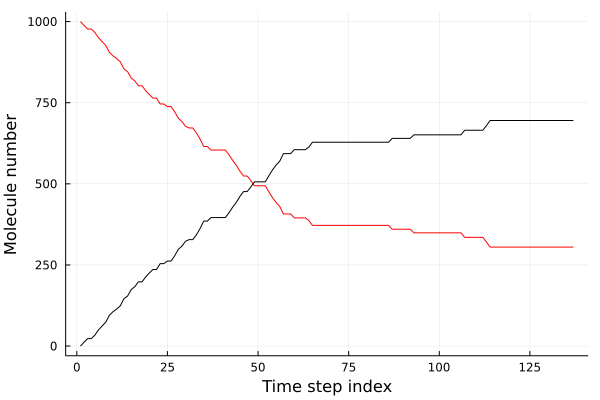

In [251]:
s=1000
plot(chemical_state[:, 1,s], legend=false, c=:red)
plot!(chemical_state[:,2,s], c=:black)
xlabel!("Time step index", fontsize=18)
ylabel!("Molecule number", fontsize=18)

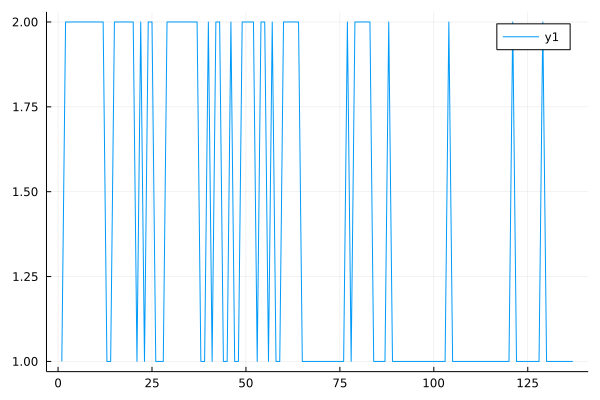

In [201]:
plot(machine_state[:,88])

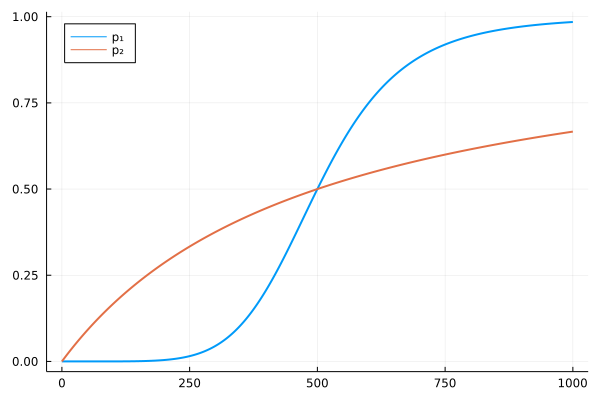

In [247]:

MA = range(0,stop=1000,step=1) |> collect;

# grab the parameters -
K1 = parameters["K1"]
n1 = parameters["n1"]
K2 = parameters["K2"]
n2 = parameters["n2"]

P1 = (MA.^n1)./(K1^n1 .+ MA.^n1);
P2 = (MA.^n2)./(K2^n2 .+ MA.^n2);

plot(MA, P1, label="p₁", legend=:topleft, lw=2)
plot!(MA, P2, label="p₂", lw=2)

In [253]:
pwd()

"/Users/jeffreyvarner/Desktop/classes/CHEME-5440-7770-Cornell-Spring-2022/prelim_2"

In [257]:
# write simulation results to disk -

# package the simulation state -
simulation_results = Dict{String,Any}()
simulation_results["parameters"] = parameters
simulation_results["initial"] = initial
simulation_results["machine_state"] = machine_state
simulation_results["chemical_state"] = chemical_state
simulation_results["T"] = T
simulation_results["𝒫"] = N

# write simulation state to disk -
_path_to_simulation_state = joinpath(pwd(),"SIMULATION-CASE-2.bson")
bson(_path_to_simulation_state, simulation_results)